# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from wapi import api_key
import wapi

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


586

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
api_key = wapi.api_key
from wapi import api_key
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# List of city data
city_data1 = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
counter = 1

# Loop through all the cities in our list
for city in cities:
    
    #Use URL plus name of city to connect to openweathermap.org's endpoint
    city_url = url + "&q=" + city
        #print each city
    print(f"Processing Record {counter} | {city}")
    
    counter = counter + 1

    
    # run API request inside try-catch and place data in json format
    try:
        #get data in json format
        city_weather = requests.get(city_url).json()
        
        # parse data and place values into variables that will be used for creating a df
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #create dictionary using the data from openweathermap.org as the values
        city_data1.append({"City": city,
                         "Lat": city_lat,
                         "lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    except:
        print(f"City {city} not found. Skipping to next city.")
    pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 | barrow
Processing Record 2 | gazimurskiy zavod
Processing Record 3 | presidencia roque saenz pena
Processing Record 4 | vaini
Processing Record 5 | bambous virieux
Processing Record 6 | punta arenas
Processing Record 7 | mataura
Processing Record 8 | ayr
Processing Record 9 | kapaa
Processing Record 10 | abnub
Processing Record 11 | luebo
Processing Record 12 | lagoa
Processing Record 13 | port alfred
Processing Record 14 | sarakhs
Processing Record 15 | mys shmidta
City mys shmidta not found. Skipping to next city.
Processing Record 16 | rawson
Processing Record 17 | albany
Processing Record 18 | denpasar
Processing Record 19 | severo-kurilsk
Processing Record 20 | toliary
City toliary not found. Skipping to next city.
Processing Record 21 | rikitea
Processing Record 22 | port elizabeth
Processing Record 23 | busselton
Processing Record 24 | provideniya
Processing Record 25 | bluff
Processing Record 26 |

Processing Record 219 | nagornskiy
Processing Record 220 | attawapiskat
City attawapiskat not found. Skipping to next city.
Processing Record 221 | faya
Processing Record 222 | olafsvik
City olafsvik not found. Skipping to next city.
Processing Record 223 | clyde river
Processing Record 224 | hovd
Processing Record 225 | taoudenni
Processing Record 226 | quatre cocos
Processing Record 227 | qaanaaq
Processing Record 228 | honningsvag
Processing Record 229 | portree
Processing Record 230 | yarada
Processing Record 231 | putina
Processing Record 232 | richards bay
Processing Record 233 | nishihara
Processing Record 234 | abu dhabi
Processing Record 235 | kostomuksha
Processing Record 236 | can
Processing Record 237 | katsina
Processing Record 238 | kruisfontein
Processing Record 239 | cururupu
Processing Record 240 | lebu
Processing Record 241 | grand gaube
Processing Record 242 | chake chake
Processing Record 243 | bengkulu
City bengkulu not found. Skipping to next city.
Processing Reco

Processing Record 444 | soma
Processing Record 445 | santa cruz
Processing Record 446 | kahului
Processing Record 447 | marsa matruh
Processing Record 448 | saleaula
City saleaula not found. Skipping to next city.
Processing Record 449 | severnyy
City severnyy not found. Skipping to next city.
Processing Record 450 | kempele
Processing Record 451 | praia da vitoria
Processing Record 452 | chipinge
Processing Record 453 | korla
City korla not found. Skipping to next city.
Processing Record 454 | genhe
Processing Record 455 | lidkoping
Processing Record 456 | necochea
Processing Record 457 | lehi
Processing Record 458 | areka
Processing Record 459 | ostersund
Processing Record 460 | pangai
Processing Record 461 | rio grande
Processing Record 462 | buraydah
Processing Record 463 | coahuayana
Processing Record 464 | asuncion nochixtlan
Processing Record 465 | ilulissat
Processing Record 466 | udachnyy
Processing Record 467 | aracati
Processing Record 468 | giresun
Processing Record 469 | n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data1)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv("../city_dataoutput.csv", index_label="City_ID",index=False, header=True)

# Show Record Count
city_data_pd.count()

City          538
Cloudiness    538
Country       538
Date          538
Humidity      538
Lat           538
Max Temp      538
Wind Speed    538
lng           538
dtype: int64

In [12]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Max Temp,Wind Speed,lng
0,barrow,100,AR,1563565889,50,-38.31,50.89,14.23,-60.23
1,gazimurskiy zavod,100,RU,1563565890,99,51.55,61.87,5.61,118.33
2,presidencia roque saenz pena,84,AR,1563565890,84,-26.79,66.55,3.98,-60.44
3,vaini,100,IN,1563565890,90,15.34,77.35,2.66,74.49
4,bambous virieux,40,MU,1563565890,78,-20.34,71.60,18.34,57.76


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

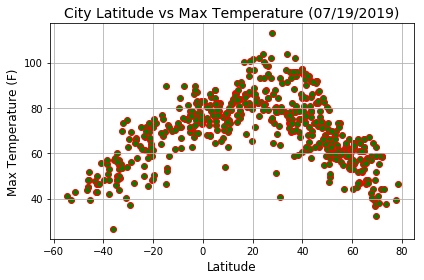

In [9]:

Lats_Temp = plt.scatter(lats, max_temps, marker="o", 
            facecolors="Green", edgecolors="red", alpha=1)

#Title + Labels
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Max Temperature (F)", fontsize = 12)
plt.title("City Latitude vs Max Temperature (07/19/2019)", fontsize = 14)

#Add Grid
plt.grid()
plt.tight_layout()
plt.savefig("LatvsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

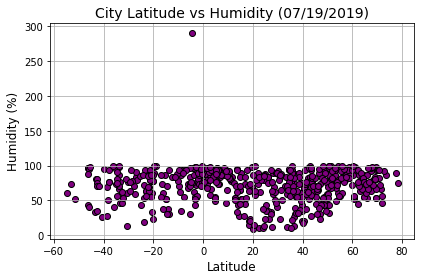

In [17]:

Lats_Humidity = plt.scatter(lats, humidity, marker="o", 
            facecolors="purple", edgecolors="black", alpha=1)

#Title + Labels
plt.xlabel("Latitude", fontsize = 12)
plt.ylabel("Humidity (%)", fontsize = 12)
plt.title("City Latitude vs Humidity (07/19/2019)", fontsize = 14)

#Add Grid
plt.grid()
plt.tight_layout()
plt.savefig("LatvsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

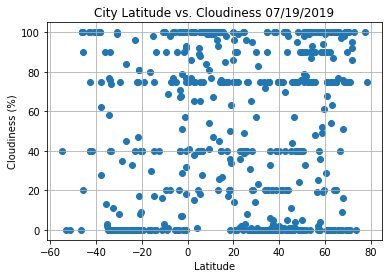

In [15]:
date = time.strftime("%m/%d/%Y")

plt.scatter(lats, cloudiness)
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("latvscloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

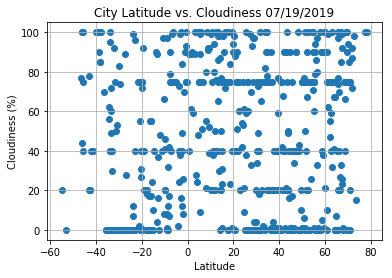

In [12]:
date = time.strftime("%m/%d/%Y")

plt.scatter(lats, cloudiness)
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("latvswindspeed.png")

# Show plot
plt.show()